This file contains first week tutorial and some additional notes for myself.

In the code below. We need to visualize the data from a ".fits" file. Fits files are used to collect the astronomical data. 

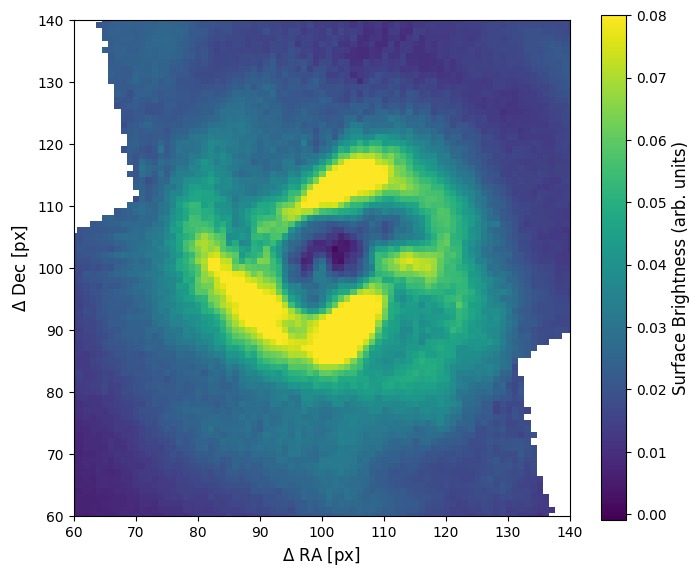

In [5]:
from astropy.io import fits
import matplotlib.pyplot as plt

file_dir = 'data/' #Which folder the data in
img_name = 'pdi_pi_collapsed.fits' #fits format is used to collect astronomical data
img = fits.getdata(file_dir+img_name,ext=1)#Pull data from fits. ext=1 index based 1st extention
#fits data can be read directly by using .getdata
# create a figure
fig = plt.figure(figsize=(8,8))
#plot in the figure
image = plt.imshow(img, origin = 'lower', vmin=-0.001, vmax=0.08)
cbar = fig.colorbar(image,shrink=0.82) #creates a side bar
cbar.set_label('Surface Brightness (arb. units)', rotation=90,fontsize=12)
plt.xlim([60,140])
plt.ylim([60,140])
plt.xlabel(r'$\Delta$ RA [px]',fontsize=12)
plt.ylabel(r'$\Delta$ Dec [px]',fontsize=12)
plt.show()

The code below is a ".csv" file. So, we use pandas in order to astropy. And we put the stars into the figure according to their angular coordinates.

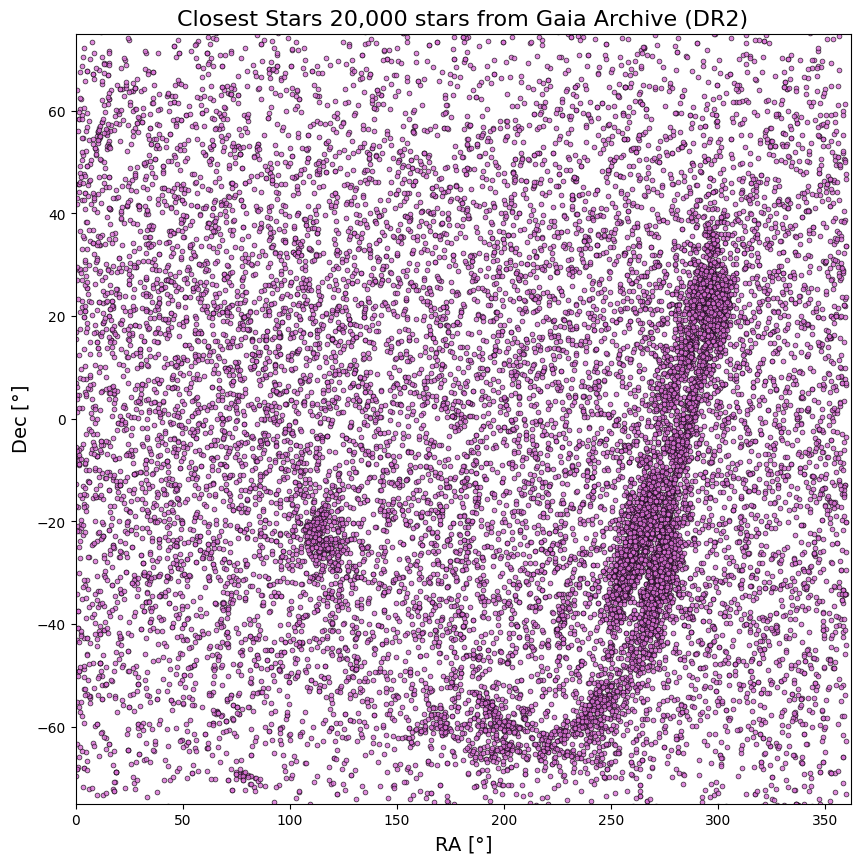

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading 20,000 Rows*97 columns of Data- Closest 20k stars from Gaia Archive (DR2)
stellar=pd.read_csv('closest20kstars.csv')#Use .read_csv to get data 

# Creating a matplotlib (pyplot) figure
fig = plt.figure(figsize = [10,10])

# Plotting the scatter graph with RA on x-axis and Dec on y-axis. alpha tells the opacity, s is the size
plt.scatter(stellar['ra'], stellar['dec'], alpha=0.8, s=12, lw = 0.5, ec = 'k', color='orchid')
# Adding labels and a title for the figure
plt.xlim([0,362])
plt.ylim([-75,75])
plt.xlabel('RA [$\degree$]', fontsize = 14)
plt.ylabel('Dec [$\degree$]', fontsize = 14)
plt.title('Closest Stars 20,000 stars from Gaia Archive (DR2)', fontsize = 16)

plt.show()

Let's Continue with the inflammation tutorial now. Since we need mathematical operations, we use numpy here. We don't take data directly from the tableau. Glob library is used to find something in the file.

Our imaginary colleague “Dr. Maverick” has invented a new miracle drug that promises to cure arthritis inflammation flare-ups after only 3 weeks since initially taking the medication! Naturally, we wish to see the clinical trial data, and after months of asking for the data they have finally provided us with a CSV spreadsheet containing the clinical trial data. The CSV file contains:

- the number of inflammation flare-ups per day for the 60 patients in the initial clinical trial, with the trial lasting 40 days.
-Each row corresponds to a patient
-Each column corresponds to a day

Once a patient has their first inflammation flare-up they take the medication and wait a few weeks for it to take effect and reduce flare-ups. 
To see how effective the treatment is we would like to: 

-Calculate the average inflammation per day across all patients
-Plot the result

inflammation-01.csv


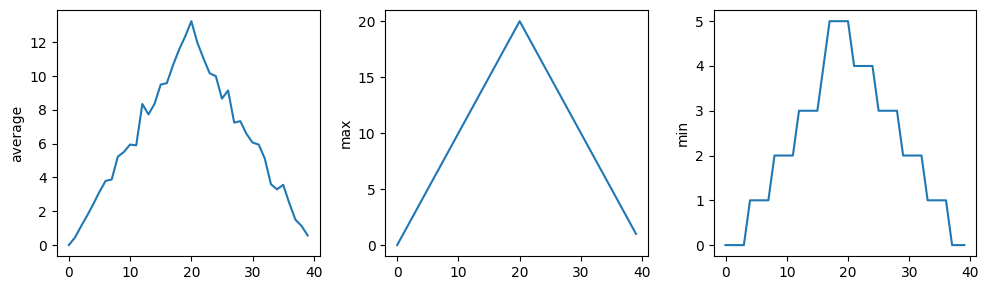

inflammation-02.csv


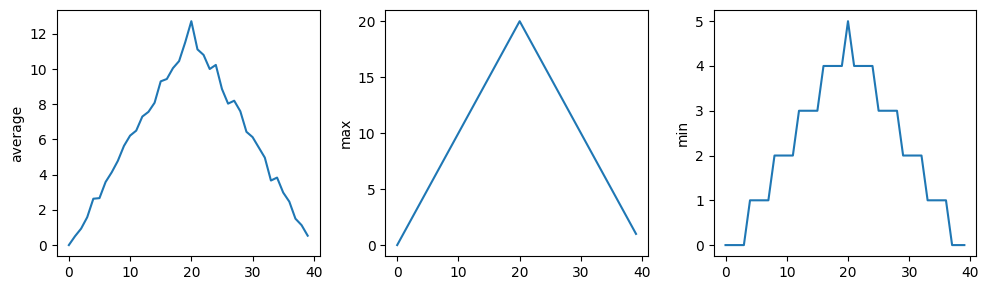

inflammation-03.csv


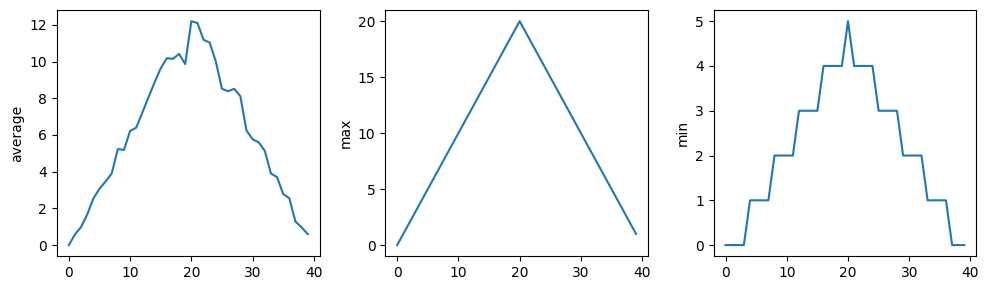

inflammation-04.csv


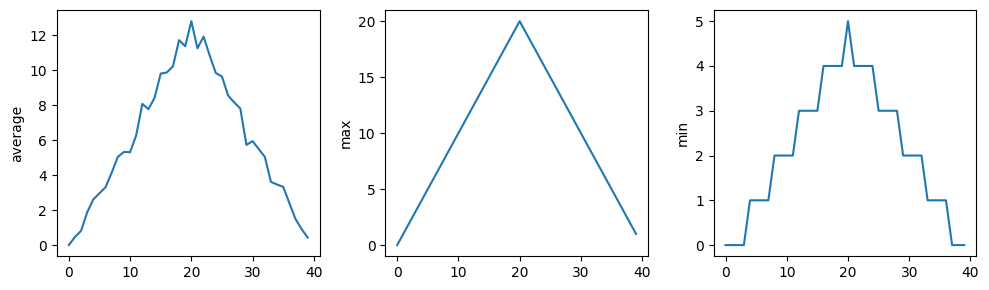

inflammation-05.csv


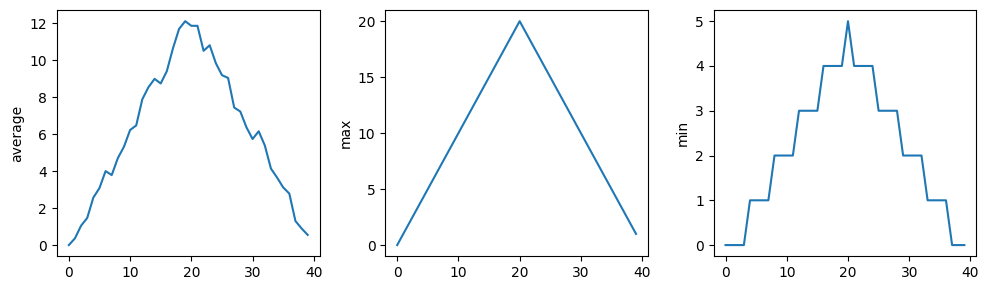

inflammation-06.csv


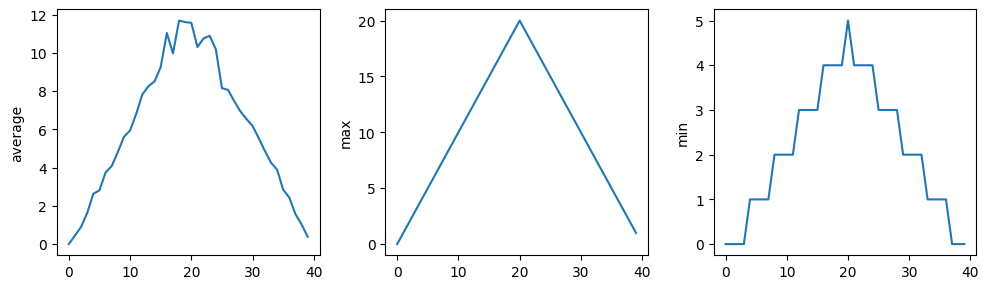

inflammation-07.csv


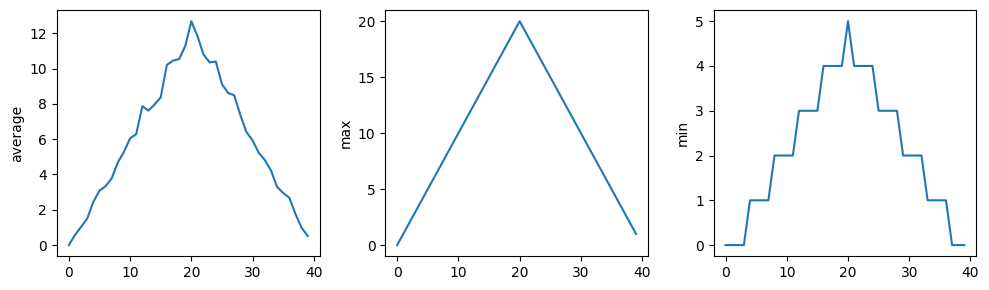

inflammation-08.csv


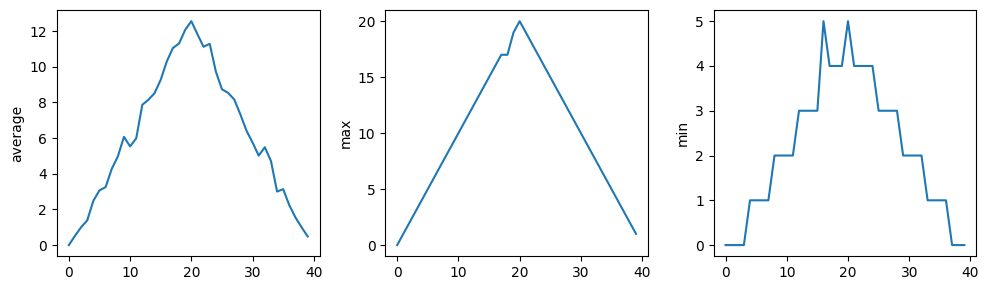

inflammation-09.csv


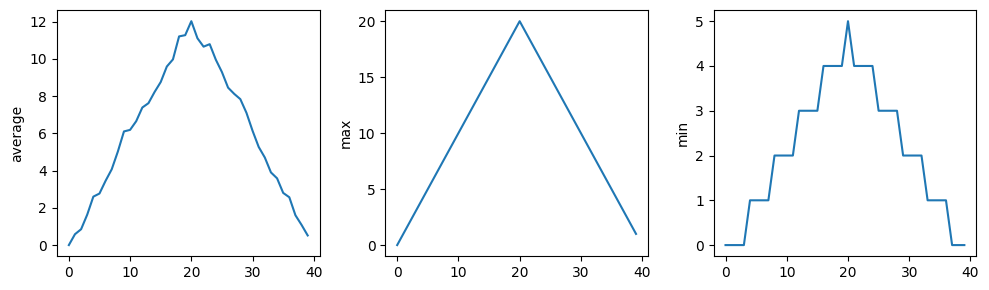

inflammation-10.csv


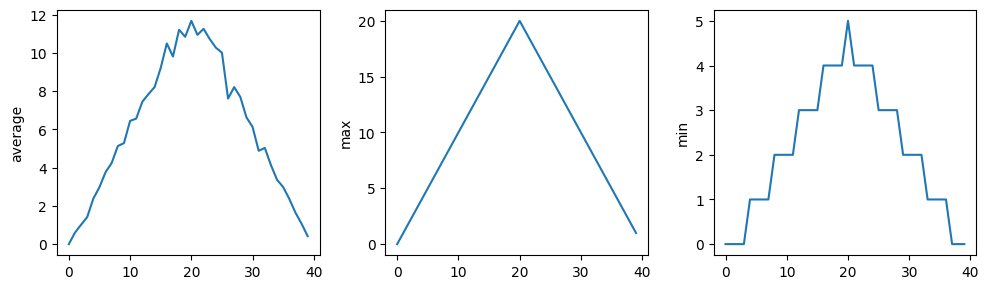

inflammation-11.csv


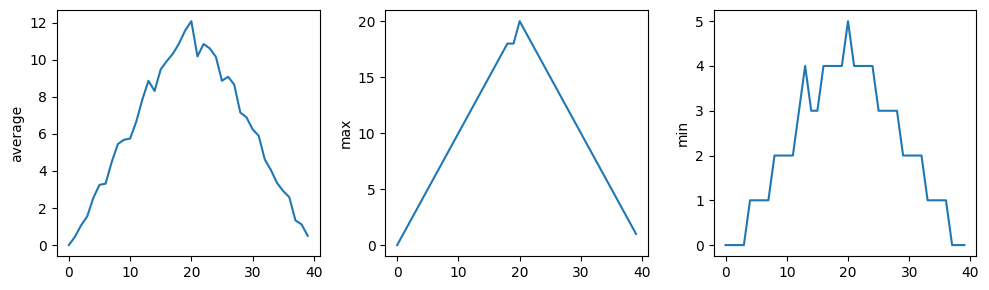

inflammation-12.csv


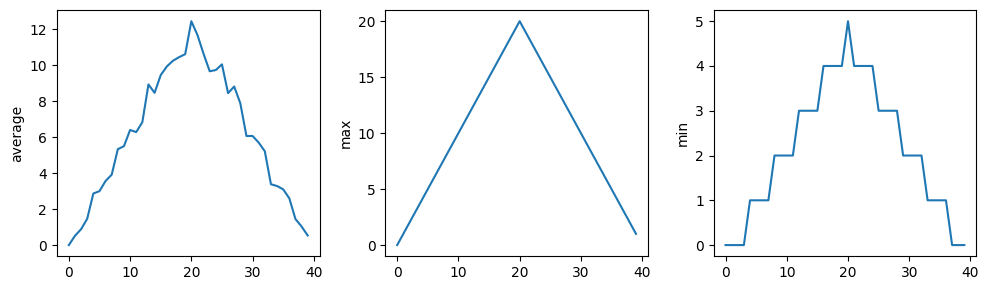

In [1]:
import glob
import numpy
import matplotlib.pyplot


filenames = sorted(glob.glob('inflammation*.csv'))#inflammationların tümü
filenames = filenames[0:12]#for all inflammation files
for filename in filenames:
    print(filename)

    data = numpy.loadtxt(fname=filename, delimiter=',') #we take the data

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))#genişlik, yükseklik

    axes1 = fig.add_subplot(1, 3, 1)#1 satır, 3 sütun, sütunların 1.si
    axes2 = fig.add_subplot(1, 3, 2)#add_subplot displays more than one plots in the same figure.
    axes3 = fig.add_subplot(1, 3, 3)#axes3 is the third plot needed to be drawn

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.amax(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.amin(data, axis=0))

    fig.tight_layout()#This makes life easier by preventing the overlap.
    matplotlib.pyplot.show()


The code below visualizes each patient's health status day by day over 40 days. Why we can't use only pandas here?

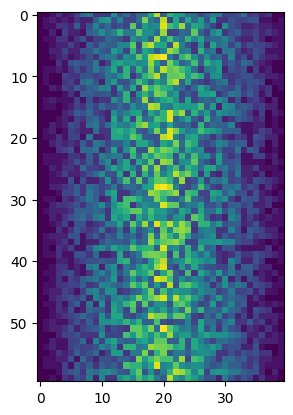

In [2]:
import numpy
import matplotlib.pyplot as plt

data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')
image = plt.imshow(data)
plt.show()

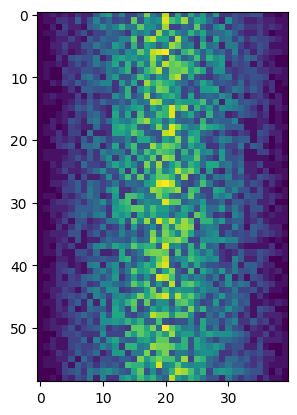

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("inflammation-01.csv", delimiter=",")
data = df.to_numpy() #turn the dataframe into a numpy array b
image = plt.imshow(data)
plt.show()